# <p style="background-color:green;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:20px 20px;"><b>Seaborn Assigment - 2</b></p>

<p style="text-align: right;"><font color='Magenta'> <b> Ed. by Duygu Jones</b><font color='black'><p>
    
<p style="text-align: right;"><font color='dodgerblue'> <b>April 2024, Batch247_Data_Science </b><font color='orange'><p>

# WITH SEABORN

In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
import warnings
warnings.filterwarnings('ignore') 

INSTRUCTIONS
1. Box and Swarm Plots in kill data
1. Most dangerous cities
1. Most dangerous states
1. Having mental ilness or not for killed people
1. Threat types
1. Flee types
<br>

## read data

if didn't work you can use this parameters: encoding="windows-1252"

In [ ]:
#expected output1:

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [8]:
#code 1:

df0= pd.read_csv('PoliceKillingsUS.csv',encoding="windows-1252")
df0

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,2822,Rodney E. Jacobs,28/07/17,shot,gun,31.0,M,NaN,Kansas City,MO,False,attack,Not fleeing,False
2531,2813,TK TK,28/07/17,shot,vehicle,NaN,M,NaN,Albuquerque,NM,False,attack,Car,False
2532,2818,Dennis W. Robinson,29/07/17,shot,gun,48.0,M,NaN,Melba,ID,False,attack,Car,False
2533,2817,Isaiah Tucker,31/07/17,shot,vehicle,28.0,M,B,Oshkosh,WI,False,attack,Car,True


In [9]:
df=df0.copy()
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


## Shape

In [10]:
#code 2:
df.shape

(2535, 14)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2535 non-null   int64  
 1   name                     2535 non-null   object 
 2   date                     2535 non-null   object 
 3   manner_of_death          2535 non-null   object 
 4   armed                    2526 non-null   object 
 5   age                      2458 non-null   float64
 6   gender                   2535 non-null   object 
 7   race                     2340 non-null   object 
 8   city                     2535 non-null   object 
 9   state                    2535 non-null   object 
 10  signs_of_mental_illness  2535 non-null   bool   
 11  threat_level             2535 non-null   object 
 12  flee                     2470 non-null   object 
 13  body_camera              2535 non-null   bool   
dtypes: bool(2), float64(1), 

In [14]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,2535.0,NaN,NaN,NaN,1445.731755,794.25949,3.0,768.5,1453.0,2126.5,2822.0
name,2535,2481,TK TK,49,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date,2535,879,24/01/17,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
manner_of_death,2535,2,shot,2363,NaN,NaN,NaN,NaN,NaN,NaN,NaN
armed,2526,68,gun,1398,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,2458.0,NaN,NaN,NaN,36.60537,13.030774,6.0,26.0,34.0,45.0,91.0
gender,2535,2,M,2428,NaN,NaN,NaN,NaN,NaN,NaN,NaN
race,2340,6,W,1201,NaN,NaN,NaN,NaN,NaN,NaN,NaN
city,2535,1417,Los Angeles,39,NaN,NaN,NaN,NaN,NaN,NaN,NaN
state,2535,51,CA,424,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 1a: Box plot of age in both genders separeted by manner of death.

In [15]:
#expected ouptut 3:

array(['shot', 'shot and Tasered'], dtype=object)

In [16]:
#code 3:
df.manner_of_death.unique()

array(['shot', 'shot and Tasered'], dtype=object)

#### INSTRUCTION: Demonstrate the Qurtiles of age in both genders separeted by manner of death.**

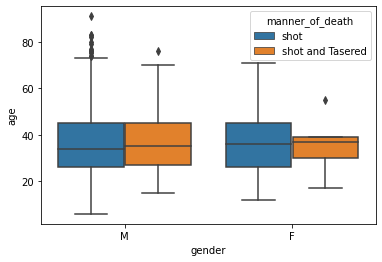

In [ ]:
#expected output 4
# with seaborn 

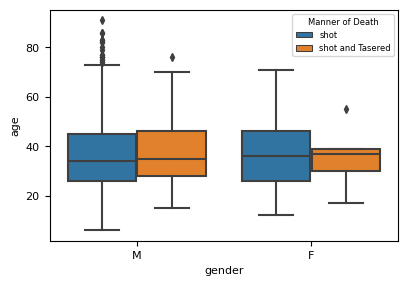

In [10]:
#code 4:

plt.figure(figsize=(4.5,3))

flierprops=dict(marker='d', color='black', markersize=4)
sns.boxplot(x = "gender", y ="age", data = df, hue = "manner_of_death", flierprops=flierprops)

plt.xlabel('gender',fontsize=8)
plt.ylabel('age',fontsize=8)

plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

plt.legend(title='Manner of Death',fontsize=6,title_fontsize=6)
plt.show()

## 1b: Swarm Plot 

#### INSTRUCTION: Demonstrate the age in both genders separeted by manner of death by a swarm plot.**

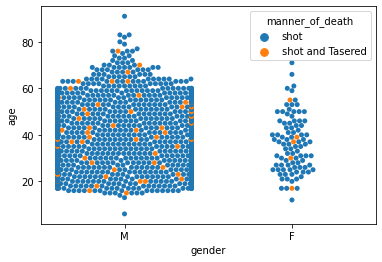

In [ ]:
#expected output 5:
# with seaborn

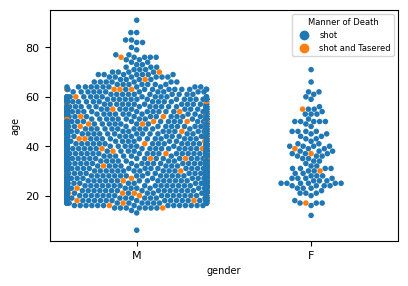

In [12]:
#code 5:

plt.figure(figsize=(4.5,3))

sns.swarmplot(x = "gender", y ="age", data = df, hue = "manner_of_death", size = 4)

plt.xlabel('gender',fontsize=7)
plt.ylabel('age',fontsize=7)

plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

plt.legend(title='Manner of Death',fontsize=6,title_fontsize=6)
plt.show()


## 2: Plot 12 most dangerous cities

In [25]:
df.sample(5)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
2037,2273,Gerardo Coronado,28/01/17,shot,gun,25.0,M,H,Fort Stockton,TX,False,attack,Car,False
1555,1745,Omar Gonzalez,28/07/16,shot,undetermined,36.0,M,H,City Terrace,CA,False,other,Car,True
830,980,Jeremy Mardis,03/11/15,shot,unarmed,6.0,M,W,Marksville,LA,False,other,Car,True
1329,1512,Matthew Tucker,04/05/16,shot,knife,18.0,M,NaN,Temecula,CA,False,other,Not fleeing,False
964,1112,Robert L. Teter,21/12/15,shot,gun,39.0,M,W,Deltona,FL,False,attack,Not fleeing,False


In [ ]:
#expected output 6:

Los Angeles      35
Phoenix          28
Houston          24
Chicago          22
Austin           18
Las Vegas        17
Columbus         16
Miami            15
San Antonio      15
St. Louis        14
Indianapolis     14
Oklahoma City    13
Name: city, dtype: int64

In [18]:
#code 6:

city_counts = df['city'].value_counts()

top_dangerous_cities = city_counts.head(12)

print(top_dangerous_cities)

city
Los Angeles      39
Phoenix          31
Houston          27
Chicago          25
Las Vegas        21
San Antonio      20
Columbus         19
Austin           18
Miami            18
St. Louis        15
Oklahoma City    14
Tucson           14
Name: count, dtype: int64


In [19]:
#expected output 7:

array([39, 31, 27, 25, 21, 20, 19, 18, 18, 15, 14, 14])

In [47]:
#code 7:

top_dangerous_cities.values.astype(int)

array([39, 31, 27, 25, 21, 20, 19, 18, 18, 15, 14, 14])

In [21]:
#expected output 8:

Index(['Los Angeles', 'Phoenix', 'Houston', 'Chicago', 'Las Vegas',
       'San Antonio', 'Columbus', 'Austin', 'Miami', 'St. Louis',
       'Oklahoma City', 'Tucson'],
      dtype='object', name='city')

In [48]:
#code 8:

top_dangerous_cities.index

Index(['Los Angeles', 'Phoenix', 'Houston', 'Chicago', 'Las Vegas',
       'San Antonio', 'Columbus', 'Austin', 'Miami', 'St. Louis',
       'Oklahoma City', 'Tucson'],
      dtype='object', name='city')

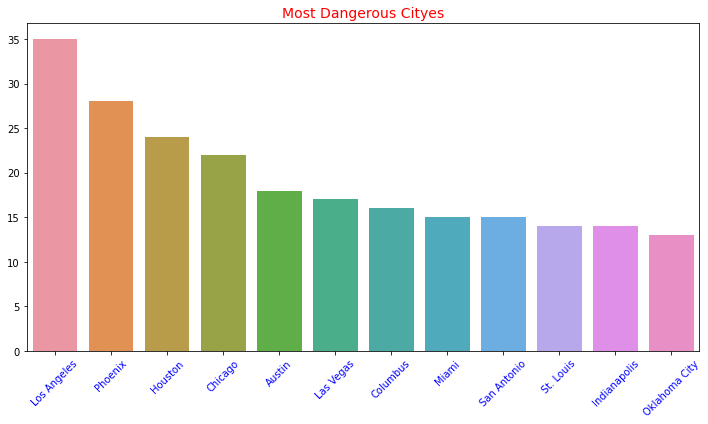

In [ ]:
#expected output 9:
# with seaborn

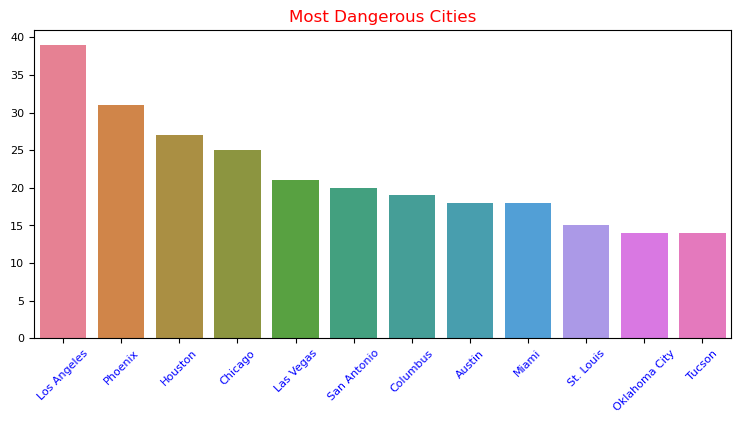

In [24]:
#code 9:
most_dangerous_cities = top_dangerous_cities.index.tolist()

most_dangerous_df = df[df['city'].isin(most_dangerous_cities)]

plt.figure(figsize=(9,4)) 

sns.countplot(x='city', data=most_dangerous_df, order=most_dangerous_cities, palette='husl')


plt.title('Most Dangerous Cities', color="red")

plt.xlabel(None)
plt.ylabel(None)

plt.xticks(rotation=45, color='blue', fontsize=8)
plt.yticks(fontsize=8);

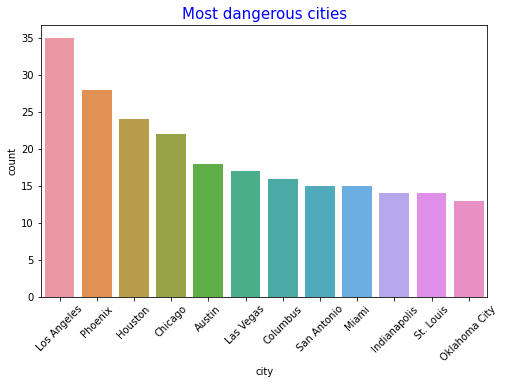

In [ ]:
#expected output 10:
# with seaborn countplot

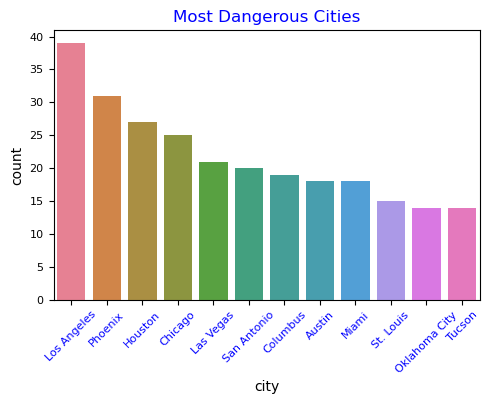

In [57]:
#code 10:
most_dangerous_cities = top_dangerous_cities.index.tolist()

most_dangerous_df = df[df['city'].isin(most_dangerous_cities)]

plt.figure(figsize=(5.5,3.5)) 

sns.countplot(x='city', data=most_dangerous_df, order=most_dangerous_cities, palette='husl')


plt.title('Most Dangerous Cities', color="blue")

plt.xticks(rotation=45, color='blue', fontsize=8)
plt.yticks(fontsize=8);

## 3: Plot 20 most dangerous states

In [ ]:
#expected output 11:

CA    366
TX    200
FL    136
AZ    105
OH     70
NC     66
OK     65
CO     63
GA     61
MO     58
TN     56
IL     56
WA     51
LA     47
AL     45
PA     45
VA     43
NY     43
WI     42
NM     41
Name: state, dtype: int64

In [32]:
#code 11:
states_counts = df['state'].value_counts()

top_dangerous_states = states_counts.head(20)

print(top_dangerous_states)


state
CA    424
TX    225
FL    154
AZ    118
OH     79
OK     78
CO     74
GA     70
NC     69
MO     64
IL     62
WA     62
TN     59
LA     57
PA     51
NM     51
AL     50
VA     47
NY     45
SC     44
Name: count, dtype: int64


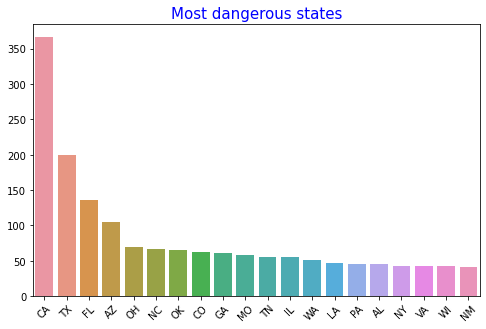

In [ ]:
#expected output 12:
# with seaborn barplot

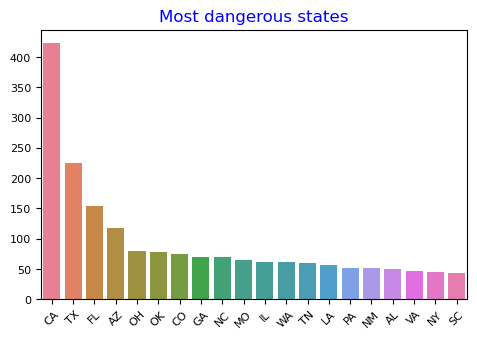

In [35]:
#code 12:
most_dangerous_states = top_dangerous_states.index.tolist()

most_dangerous_States_df = df[df['state'].isin(most_dangerous_states)]

plt.figure(figsize=(5.5,3.5)) 

sns.countplot(x='state', data=most_dangerous_States_df, order=most_dangerous_states, palette='husl')


plt.title('Most dangerous states', color="blue")
plt.xlabel(None)
plt.ylabel(None)

plt.xticks(rotation=45, fontsize=8)
plt.yticks(fontsize=8);

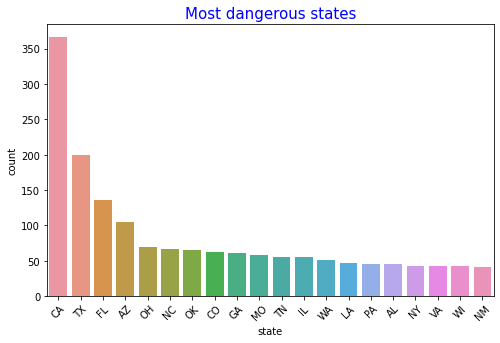

In [ ]:
#expected output 13:
# with seaborn countplot

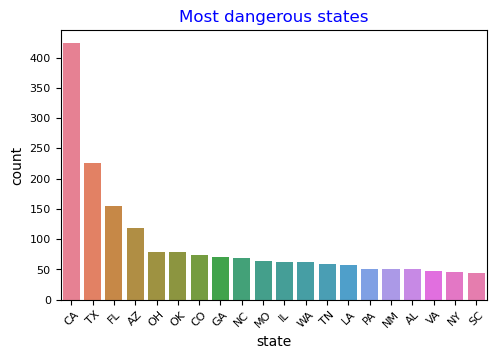

In [36]:
#code 13:
most_dangerous_states = top_dangerous_states.index.tolist()

most_dangerous_States_df = df[df['state'].isin(most_dangerous_states)]

plt.figure(figsize=(5.5,3.5)) 

sns.countplot(x='state', data=most_dangerous_States_df, order=most_dangerous_states, palette='husl')


plt.title('Most dangerous states', color="blue")

plt.xticks(rotation=45, fontsize=8)
plt.yticks(fontsize=8);

## 4: Plot Having mental ilness or not for killed people

In [ ]:
#expected output 14:

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False


In [68]:
#code 14:
df.iloc[:2]

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False


In [ ]:
#expected output 15:

False    1681
True      573
Name: signs_of_mental_illness, dtype: int64

In [48]:
#code15:
df['signs_of_mental_illness'].value_counts()

signs_of_mental_illness
False    1902
True      633
Name: count, dtype: int64

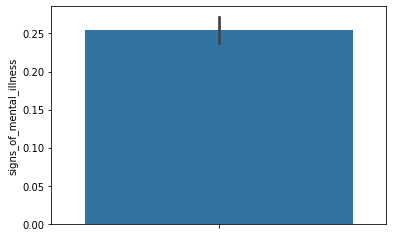

In [142]:
#expected output 16:
#with seaborn barplot

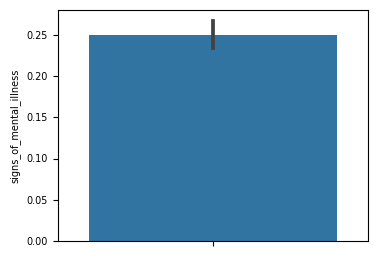

In [82]:
#code 16:
plt.figure(figsize=(4,3)) 
sns.barplot(data = df, y = "signs_of_mental_illness");

plt.ylabel('signs_of_mental_illness',fontsize=7)
plt.yticks(fontsize=7)
plt.show()

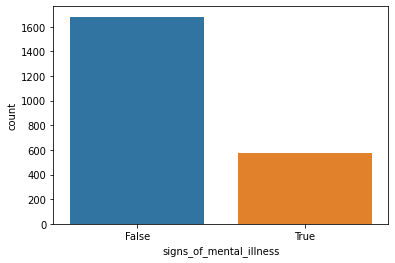

In [ ]:
#expected output 17:
# with seaborn

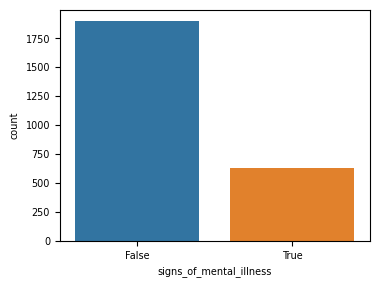

In [117]:
#code 17:
plt.figure(figsize=(4,3)) 

sns.countplot(x='signs_of_mental_illness', data=df)

plt.xlabel('signs_of_mental_illness',fontsize=7)
plt.ylabel('count',fontsize=7)

plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.show()

## 5: Plot number of Threat Types

In [ ]:
#expected output 18:

attack          1462
other            677
undetermined     115
Name: threat_level, dtype: int64

In [115]:
#code 18:
df.threat_level.value_counts()

threat_level
attack          1611
other            766
undetermined     158
Name: count, dtype: int64

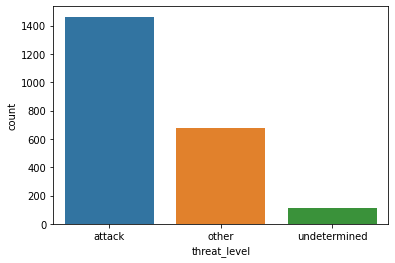

In [ ]:
#expected output 19:
# with seaborn

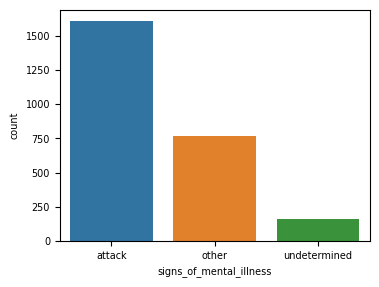

In [116]:
#code 19:
plt.figure(figsize=(4,3)) 

sns.countplot(x='threat_level', data=df)

plt.xlabel('threat_level',fontsize=7)
plt.ylabel('count',fontsize=7)

plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.show()

## 6: Plot number of Flee Types

In [ ]:
#expected output 20:

Not fleeing    1528
Car             360
Foot            278
Other            88
Name: flee, dtype: int64

In [118]:
#code 20:
df.flee.value_counts()

flee
Not fleeing    1695
Car             385
Foot            294
Other            96
Name: count, dtype: int64

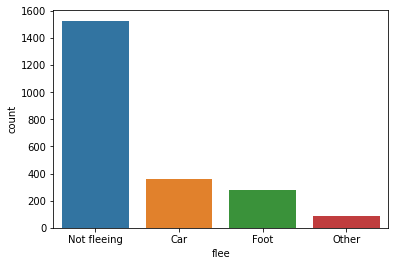

In [ ]:
#expected output 21:
# with seaborn

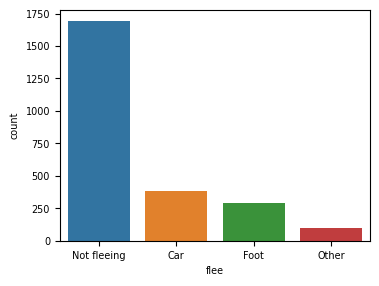

In [121]:
#code 21:
plt.figure(figsize=(4,3)) 

sns.countplot(x='flee', data=df)

plt.xlabel('flee',fontsize=7)
plt.ylabel('count',fontsize=7)

plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.show()

# Congratulations


# <p style="background-color:green;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:20px 20px;"><b>Seaborn Assigment - 2</b></p>